In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import fasttext
from pycountry import languages
import re


In [112]:
# bringing in the model path for fasttext
PRETRAINED_MODEL_PATH = 'lid.176.bin'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)


In [113]:
# function to help figure out the language
def lang_class(x):
    x = x .replace("\n", " ")
    lang = model.predict(x)
    
    return lang

In [114]:
# function to help retrieve the language name using the language code
def lang_from_code(x):
    x = x[0]
    x = str(x)
  
    match = re.match(r"__label__([a-zA-Z]+)", x)
    match = match.group(1)

    if len(match) == 2:
        
        try:
            lang = languages.get(alpha_2=match).name

        except:
            lang = match
    elif len(match) == 3:
        try:
            lang = languages.get(alpha_3=match).name
        
        except:   
            lang = match
        
    return(lang)

In [3]:
# reading in the data
data = pd.read_json("PRC-UK_Embassy_press_releases.ndjson",lines=True)

In [25]:
# creating new columns for the length of title and body in terms of words
data["title_length"] = data["title"].str.split().apply(len)
data["body_length"] = data["body"].str.split().apply(len)

### Exploring the distribution of Ambassador

<AxesSubplot:ylabel='ambassador'>

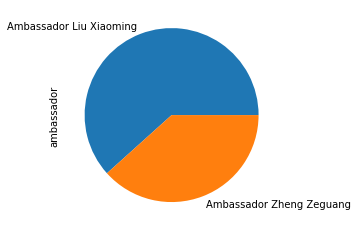

In [47]:
# comparing the appearances of Ambassador within the dataset
data["ambassador"].value_counts().plot.pie()

In [48]:
data["ambassador"].value_counts()

Ambassador Liu Xiaoming     230
Ambassador Zheng Zeguang    143
Name: ambassador, dtype: int64

This is rather surprising as Ambassador Zheng Zeguang has only been in the role since 2021, thus it's surprising he's been the ambassador with so many press releases in such a short time.

### Exploring the Title and Body length

#### Title Length

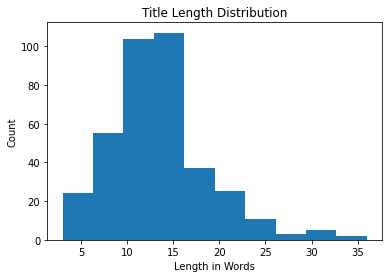

In [82]:
data["title_length"].plot.hist()
plt.title("Title Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

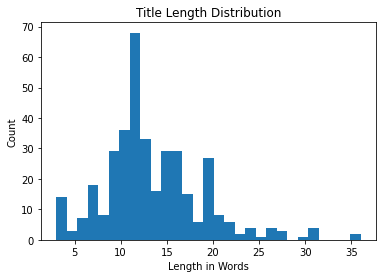

In [84]:
# exploring the distribution of title length
data["title_length"].plot.hist(bins=len(data["title_length"].value_counts()))
plt.title("Title Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

These both show that the length in words for the titles tend to cluster around 10 to around 15 words.

#### Body Length

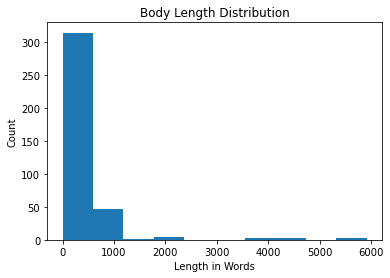

In [85]:
data["body_length"].plot.hist()
plt.title("Body Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

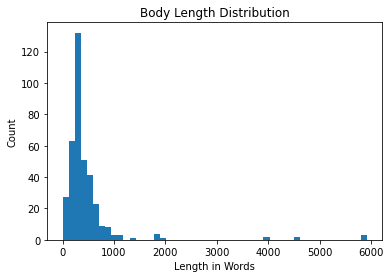

In [86]:
data["body_length"].plot.hist(bins=50)
plt.title("Body Length Distribution")
plt.ylabel("Count")
plt.xlabel("Length in Words")
plt.show()

These show that the press releases are generally around 400-800 words in length.

### Comparing Ambassadors on the descriptive statistics for title and body length

#### Looking at title length in a little greater detail

In [89]:
# looking at the descriptive statistics for title length
data["title_length"].groupby(data["ambassador"]).describe()

,count,mean,std,min,25%,50%,75%,max
ambassador,,,,,,,,
Ambassador Liu Xiaoming,230.0,13.534783,5.830660,3.0,10.0,13.0,16.0,36.0
Ambassador Zheng Zeguang,143.0,13.314685,4.906764,3.0,10.0,13.0,16.0,31.0


In [91]:
# looking at the median for title length
data["title_length"].groupby(data["ambassador"]).median()

ambassador
Ambassador Liu Xiaoming     13
Ambassador Zheng Zeguang    13
Name: title_length, dtype: int64

In [99]:
# looking at the variance for title length
data["title_length"].groupby(data["ambassador"]).var()

ambassador
Ambassador Liu Xiaoming     33.996601
Ambassador Zheng Zeguang    24.076332
Name: title_length, dtype: float64

Looking at these, it seems that the title length is fairly stable over time. That's unsurprising as the title length is likely driven more by fairly stable convention than the diplomacy of the day. 

#### Looking at body length in a little greater detail

In [88]:
# looking at the descriptive statistics for body length
data["body_length"].groupby(data["ambassador"]).describe()

,count,mean,std,min,25%,50%,75%,max
ambassador,,,,,,,,
Ambassador Liu Xiaoming,230.0,423.613043,673.547574,0.0,221.5,301.0,390.75,5921.0
Ambassador Zheng Zeguang,143.0,544.188811,709.162658,0.0,254.0,397.0,579.00,5921.0


In [92]:
# looking at the median for body length
data["body_length"].groupby(data["ambassador"]).median()

ambassador
Ambassador Liu Xiaoming     301
Ambassador Zheng Zeguang    397
Name: body_length, dtype: int64

In [100]:
# looking at variance for body length
data["body_length"].groupby(data["ambassador"]).var()

ambassador
Ambassador Liu Xiaoming     453666.334327
Ambassador Zheng Zeguang    502911.675367
Name: body_length, dtype: float64

### Statistical Significance Tests

In [101]:
# fill in when I get a chance to figure out what's applicable here
# I think I might buy myself the stats book as a gift so I can brush up...

### Looking at the distribution over time of press releases

#### Distributions over time

Text(0, 0.5, '# of press releases')

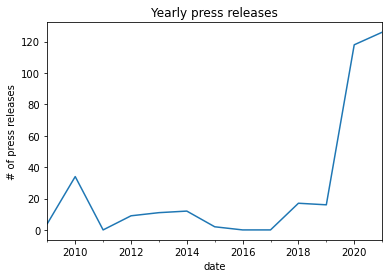

In [145]:
# showing the trends in press releases over time on a yearly basis
data.resample("Y",on="date").count().plot(y="body")
plt.title("Yearly press releases")
plt.legend('',frameon=False)
plt.ylabel("# of press releases")

Text(0, 0.5, '# of press releases')

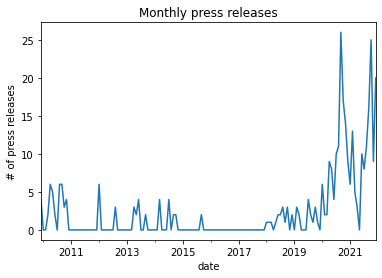

In [147]:
# showing the trends in press releases over time on a monthly basis
data.resample("M",on="date").count().plot(y="body")
plt.title("Monthly press releases")
plt.legend('',frameon=False)
plt.ylabel("# of press releases")

#### Yearly distribution

In [ ]:
# I want a graph that shows when things happened; 
# I want to have a different color for different ambassadors...we'll have to figure out how to show that
# that requires having the y1 and y2 of each ambassador and plotting on the x-axis of the dates...

In [219]:
# by taking two columns, grouping them, and then resampling them, while taking the count, we can find the yearly count
# grouping by ambassador allows for an easy showing of the count by year
data[["date","ambassador"]].groupby(data["ambassador"]).resample("Y", on="date").count()

date  ambassador
ambassador               date                        
Ambassador Liu Xiaoming  2009-12-31     4           4
                         2010-12-31    32          32
                         2011-12-31     0           0
                         2012-12-31     9           9
                         2013-12-31    11          11
                         2014-12-31    12          12
                         2015-12-31     2           2
                         2016-12-31     0           0
                         2017-12-31     0           0
                         2018-12-31    17          17
                         2019-12-31    16          16
                         2020-12-31    84          84
                         2021-12-31    19          19
Ambassador Zheng Zeguang 2010-12-31     2           2
                         2011-12-31     0           0
                         2012-12-31     0           0
                         2013-12-31     0           0
                         2014-12-31     0           0
                         2015-12-31     0           0
                         2016-12-31     0           0
                         2017-12-31     0           0
                         2018-12-31     0           0
                         2019-12-31     0           0
                         2020-12-31    34          34
                         2021-12-31   107         107

<AxesSubplot:xlabel='date'>

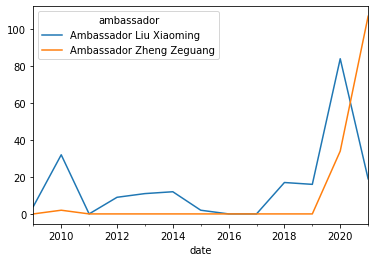

In [237]:
# by unstacking the resampling by ambasador & then selecting the date column & plotting it, we can show the yearly trend
grouped = data[["date","ambassador"]].groupby(data["ambassador"]).resample("Y", on="date").count()
grouped.unstack("ambassador",fill_value=0)["date"].plot()

Looking at the both the table of yearly trends and the graph, we can see some problems in the data. It has some errors in it from the standpoint of who was Ambassador and when. Ambassador Zheng Zeguang didn't assume office until June 2021 so the two releases under him in 2010 are...questionable. I suspect they are likely artifacts resulting from the way that the releases are stored/retrieved from the wayback machine. It's important to look in greater detail at the monthly distribution to se how that is patterned as Ambassador Liu Xiaoming left his office at the end of January 2021. 

An additional problem with the data is it likely has gaps. It is improbable that there were no press releases between 2015 and 2018 by the PRC Embassy in the UK and Ireland. Unfortunately, the Wayback Machine isn't a comprehensive records of press releases and barring a better data source hitherto unfound, this is the best we can work with here. 

#### Monthly Distribution

We're starting with the monthly distribution for 2021 alone to examine how it is distributed and see if it matches the reality of who was ambassador. 

In [269]:
# starting by filtering the data down to just 2021, then using a groupby and resampling on a monthly basis
monthly = data.loc[data["date"] > "2020-12-31",["date","ambassador"]].groupby(data["ambassador"]).resample("M", on="date").count()
# going ahead and unstacking
monthly = monthly.unstack("ambassador",fill_value=0)["date"]

In [271]:
# printing the monthly count
monthly

ambassador,Ambassador Liu Xiaoming,Ambassador Zheng Zeguang
date,,
2021-01-31,4,2
2021-02-28,9,4
2021-03-31,4,1
2021-04-30,2,1
2021-05-31,0,0
2021-06-30,0,10
2021-07-31,0,8
2021-08-31,0,11
2021-09-30,0,16


<AxesSubplot:xlabel='date'>

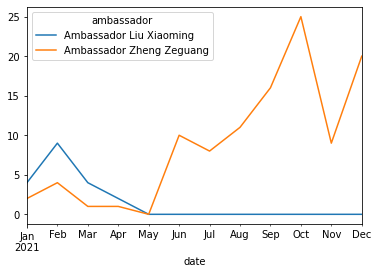

In [270]:
# plotting the monthly count
monthly.plot()

Looking at the monthly plot and table, it's immediately clear there are issues in the data here. The current ambassador has releases attributed to him before he started and the prior ambassador has releases attributed to him after he stepped out of his position. 

### Trends in title & body length over time

#### Looking at trends within title and body length over time

<AxesSubplot:xlabel='date'>

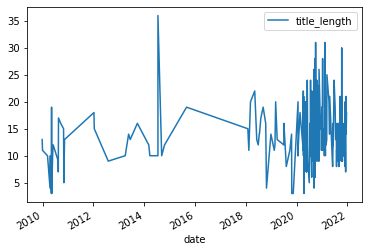

In [108]:
# exploring the time series data of the title length
data.plot(x="date",y="title_length")

<AxesSubplot:xlabel='date'>

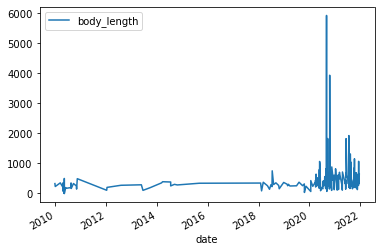

In [107]:
# exploring the time series data of the body length
data.plot(x="date",y="body_length")

#### Mean title & body length over time

<AxesSubplot:xlabel='date'>

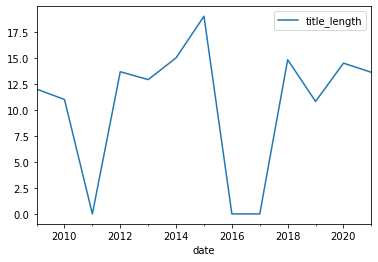

In [280]:
# looking at the mean title length over time
data.resample("Y", on="date").mean().fillna(0).plot(y="title_length")

<AxesSubplot:xlabel='date'>

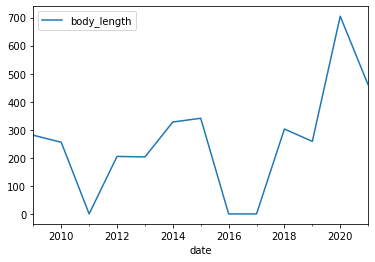

In [281]:
# looking at the mean body length over time
data.resample("Y", on="date").mean().fillna(0).plot(y="body_length")

Looking at these, it's fairly clear that the title length is stable over time. Again, this isn't too surprising. The body length seems to be likewise stable over time at least until around 2021. This isn't surprising as it matches the difference we observe between in the descriptive statistics when the data is grouped by ambassador. 

#### Looking at Title & Body Length by Ambassador